In [ ]:
import numpy as np
from mp_api.client import MPRester
from matminer.featurizers.site import CrystalNNFingerprint
from matminer.featurizers.structure import SiteStatsFingerprint
from api import api

with MPRester(api()) as mpr:

    # Get structures.
    diamond = mpr.get_structure_by_material_id("mp-66")
    gaas = mpr.get_structure_by_material_id("mp-2534")
    rocksalt = mpr.get_structure_by_material_id("mp-22862")
    perovskite = mpr.get_structure_by_material_id("mp-5827")
    #spinel_caco2s4 = mpr.get_structure_by_material_id("mvc-12728")
    spinel_sicd2O4 = mpr.get_structure_by_material_id("mp-560842")

    # Calculate structure fingerprints.
    ssf = SiteStatsFingerprint(
        CrystalNNFingerprint.from_preset('ops', distance_cutoffs=None, x_diff_weight=0),
        stats=('mean', 'std_dev', 'minimum', 'maximum'))
    v_diamond = np.array(ssf.featurize(diamond))
    v_gaas = np.array(ssf.featurize(gaas))
    v_rocksalt = np.array(ssf.featurize(rocksalt))
    v_perovskite = np.array(ssf.featurize(perovskite))
    #v_spinel_caco2s4 = np.array(ssf.featurize(spinel_caco2s4))
    v_spinel_sicd2O4 = np.array(ssf.featurize(spinel_sicd2O4))

    # Print out distance between structures.
    print('Distance between diamond and GaAs: {:.4f}'.format(np.linalg.norm(v_diamond - v_gaas)))
    print('Distance between diamond and rocksalt: {:.4f}'.format(np.linalg.norm(v_diamond - v_rocksalt)))
    print('Distance between diamond and perovskite: {:.4f}'.format(np.linalg.norm(v_diamond - v_perovskite)))
    print('Distance between rocksalt and perovskite: {:.4f}'.format(np.linalg.norm(v_rocksalt - v_perovskite)))
    #print('Distance between Ca(CoS2)2-spinel and Si(CdO2)2-spinel: {:.4f}'.format(np.linalg.norm(v_spinel_caco2s4 - v_spinel_sicd2O4)))

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17848.10it/s]


Distance between diamond and GaAs: 0.0000
Distance between diamond and rocksalt: 3.5724
Distance between diamond and perovskite: 3.5540
Distance between rocksalt and perovskite: 2.7417


In [8]:
type(diamond)

pymatgen.core.structure.Structure

In [30]:
class scm:
    import numpy as np
    from mp_api.client import MPRester
    from matminer.featurizers.site import CrystalNNFingerprint
    from matminer.featurizers.structure import SiteStatsFingerprint
    from api import api
    
    def __init__(self, target_str=None, comp_str_list=None):
        self.target_str = target_str
        self.comp_str_list = comp_str_list

    def load(self, target_str, comp_str_list):
        # Implement loading structure
        from pymatgen.core.structure import Structure
        if isinstance(target_str, Structure):
            self.target_str = target_str
        elif isinstance(target_str, str) and target_str.startswith("mp-"):
            with MPRester(api()) as mpr:
                self.target_str = mpr.get_structure_by_material_id(target_str)
        else:
            raise ValueError("Invalid target_str type!! \n Please provide a pymatgen Structure or a valid mp-id")
        
        self.comp_str_list = []

        for i in range(len(comp_str_list)):
            if isinstance(comp_str_list[i], Structure):
                self.comp_str_list.append(comp_str_list[i])
            elif isinstance(comp_str_list[i], str) and comp_str_list[i].startswith("mp-"):
                with MPRester(api()) as mpr:
                    self.comp_str_list.append(mpr.get_structure_by_material_id(comp_str_list[i]))
            else:
                raise ValueError("Invalid List type!! \n Please provide a list of pymatgen Structures or valid mp-ids")
        #self.comp_str_list = comp_str_list
        #print(self.comp_str_list)
    def debug(self):
        print("Target Structure: ", self.target_str)
        print("Comparison Structures: ", self.comp_str_list)

    def name(self, target_name, comp_name):
        if type(target_name)==str:
            self.target_name = target_name
        else:
            raise ValueError("Invalid target_name type!! \n Please provide a string")
        self.comp_name = comp_name

    def match(self):
        # Implement matching logic
        ssf = SiteStatsFingerprint(
        CrystalNNFingerprint.from_preset('ops', distance_cutoffs=None, x_diff_weight=0),
        stats=('mean', 'std_dev', 'minimum', 'maximum'))
        
        self.str_distance=[] ; atari=[1000,None]
        target_feature=np.array(ssf.featurize(self.target_str))

        for i in range(len(self.comp_str_list)):
            candidates=np.array(ssf.featurize(self.comp_str_list[i]))
            self.str_distance.append(np.linalg.norm(target_feature - candidates))
            if self.str_distance[i]<atari[0]:
                atari[0]=self.str_distance[i]
                atari[1]=i
        print("Most similar structure is No.{}, with distance {:.4f}".format(atari[1],atari[0]))
matcher = scm()
matcher.load("mp-66", ["mp-2534", "mp-22862", "mp-5827", "mp-560842"])

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15887.52it/s]


In [32]:
matcher.match()

Most similar structure is No.0, with distance 0.0000


In [10]:
import os
resC=["mp-66","mp-2534","mp-22862","mp-5827","mp-560842"]
path_output_dir = "./structure_match/"   ##POSCARファイルを出力するディレクトリを指定
if not os.path.exists(path_output_dir): ##フォルダがない場合は、フォルダを作成するというコマンド
    os.makedirs(path_output_dir)

with MPRester( "UoTjWPjyhIr2TUWRLcauWN0UQlN9UxmP" ) as mpr:
    results = mpr.materials.summary.search( material_ids=resC) ## 純粋に、resCリスト内に含まれる各要素を検索して、物質の情報をresultsに格納していく、という動作を繰り返します。
    for i in range(0,len(resC)):
        ofile = path_output_dir+"POSCAR_"+resC[i]+".vasp"  ##ofileはPOSCARがどのように出力されるかを示しています。例えば"mp-1"の場合、jupyter notebookを保存したフォルダ内にFe_tier5というフォルダを作成し、さらにその中にPOSCAR_mp-1を出力するという動作を行うはずです。
        results[i].structure.to(filename = ofile)  ## fileを出力

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

# POSCARが絡むとどうなるのか？？？

In [42]:
from pymatgen.core import Structure
filename = 'POSCAR_MASnI3'
struc = Structure.from_file(filename)
struc

Structure Summary
Lattice
    abc : 6.3200001717 6.3200001717 6.3200001717
 angles : 90.0 90.0 90.0
 volume : 252.43598857433085
      A : np.float64(6.3200001717) np.float64(0.0) np.float64(0.0)
      B : np.float64(0.0) np.float64(6.3200001717) np.float64(0.0)
      C : np.float64(0.0) np.float64(0.0) np.float64(6.3200001717)
    pbc : True True True
PeriodicSite: I (3.16, 0.0, 0.0) [0.5, 0.0, 0.0]
PeriodicSite: I (0.0, 3.16, 0.0) [0.0, 0.5, 0.0]
PeriodicSite: I (0.0, 0.0, 3.16) [0.0, 0.0, 0.5]
PeriodicSite: Sn (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: N (3.895, 3.16, 3.16) [0.6163, 0.5, 0.5]
PeriodicSite: C (2.425, 3.16, 3.16) [0.3837, 0.5, 0.5]
PeriodicSite: H (4.292, 4.024, 3.573) [0.6791, 0.6367, 0.5654]
PeriodicSite: H (4.291, 2.364, 3.69) [0.679, 0.374, 0.5839]
PeriodicSite: H (2.069, 3.233, 4.193) [0.3274, 0.5115, 0.6635]
PeriodicSite: H (4.292, 3.095, 2.202) [0.6791, 0.4897, 0.3484]
PeriodicSite: H (2.072, 2.228, 2.707) [0.3278, 0.3526, 0.4284]
PeriodicSite: H (2.073, 4.0

In [52]:
from pymatgen.core import Structure
filename = 'POSCAR_MASnI3'
struc = Structure.from_file(filename)
struc
# Remove C, H, N atoms from the structure
elements_to_remove = ["C", "H", "N"]

sites_to_keep = [site for site in struc.sites if site.specie.symbol not in elements_to_remove]
new_struc = Structure(struc.lattice, [site.specie for site in sites_to_keep], [site.frac_coords for site in sites_to_keep])

coords_to_average = [site.frac_coords for site in struc.sites if site.specie.symbol in elements_to_remove]
if coords_to_average:
    mean_coords = np.mean(coords_to_average, axis=0)
    # Add a C atom at the mean fractional coordinate
    new_struc.append("C", mean_coords)
new_struc

Structure Summary
Lattice
    abc : 6.3200001717 6.3200001717 6.3200001717
 angles : 90.0 90.0 90.0
 volume : 252.43598857433085
      A : np.float64(6.3200001717) np.float64(0.0) np.float64(0.0)
      B : np.float64(0.0) np.float64(6.3200001717) np.float64(0.0)
      C : np.float64(0.0) np.float64(0.0) np.float64(6.3200001717)
    pbc : True True True
PeriodicSite: I (3.16, 0.0, 0.0) [0.5, 0.0, 0.0]
PeriodicSite: I (0.0, 3.16, 0.0) [0.0, 0.5, 0.0]
PeriodicSite: I (0.0, 0.0, 3.16) [0.0, 0.0, 0.5]
PeriodicSite: Sn (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: C (3.176, 3.16, 3.158) [0.5025, 0.5, 0.4997]

### 分子を単一原子に置き換えるスクリプト(今回の場合は、MAを構成するC,H,Nの平均座標を持ってくる)

In [48]:
from pymatgen.core import Structure
filename = 'CH3NH3PbI3 (1).cif'
struc = Structure.from_file(filename)
struc
# Remove C, H, N atoms from the structure
elements_to_remove = ["C", "H", "N"]

sites_to_keep = [site for site in struc.sites if site.specie.symbol not in elements_to_remove]
new_struc = Structure(struc.lattice, [site.specie for site in sites_to_keep], [site.frac_coords for site in sites_to_keep])

coords_to_average = [site.frac_coords for site in struc.sites if site.specie.symbol in elements_to_remove]
if coords_to_average:
    mean_coords = np.mean(coords_to_average, axis=0)
    #mean_coords = wrap_to_center(mean_coords)
    for i in range(len(mean_coords)):
        if mean_coords[i] > 0.5:
            mean_coords[i] -= 0.5
        elif mean_coords[i] < -0.5:
            mean_coords[i] += 0.5
    # Add a C atom at the mean fractional coordinate
    new_struc.append("C", mean_coords)
new_struc

Structure Summary
Lattice
    abc : 6.29012 6.273890000000001 6.29704
 angles : 90.0014 90.36093 89.99929
 volume : 248.49843935580267
      A : np.float64(6.289995196088408) np.float64(0.0) np.float64(-0.03962382597313583)
      B : np.float64(7.678085543739923e-05) np.float64(6.273889997657259) np.float64(-0.00015330005235564468)
      C : np.float64(0.0) np.float64(0.0) np.float64(6.29704)
    pbc : True True True
PeriodicSite: Pb (2.995, 3.137, 2.976) [0.4762, 0.5, 0.4756]
PeriodicSite: I (2.685, 3.136, 6.108) [0.4268, 0.4999, 0.9726]
PeriodicSite: I (2.742, 0.0002823, 3.172) [0.4359, 4.5e-05, 0.5065]
PeriodicSite: I (6.057, 3.138, 2.781) [0.9629, 0.5002, 0.4477]
PeriodicSite: C (0.1386, 0.7835, 0.0725) [0.02203, 0.1249, 0.01166]

In [6]:
with MPRester("UoTjWPjyhIr2TUWRLcauWN0UQlN9UxmP") as mpr:

    # Get structures.
    diamond = mpr.get_structure_by_material_id("mp-66")
    gaas = mpr.get_structure_by_material_id("mp-2534")
    rocksalt = mpr.get_structure_by_material_id("mp-22862")
    perovskite = mpr.get_structure_by_material_id("mp-5827")
    #spinel_caco2s4 = mpr.get_structure_by_material_id("mvc-12728")
    spinel_sicd2O4 = mpr.get_structure_by_material_id("mp-560842")

    # Calculate structure fingerprints.
    ssf = SiteStatsFingerprint(
        CrystalNNFingerprint.from_preset('ops', distance_cutoffs=None, x_diff_weight=0),
        stats=('mean', 'std_dev', 'minimum', 'maximum'))
    v_diamond = np.array(ssf.featurize(diamond))
    v_gaas = np.array(ssf.featurize(gaas))
    v_rocksalt = np.array(ssf.featurize(rocksalt))
    v_perovskite = np.array(ssf.featurize(perovskite))
    v_struc = np.array(ssf.featurize(struc))
    v_new_struc = np.array(ssf.featurize(new_struc))
    v_spinel_sicd2O4 = np.array(ssf.featurize(spinel_sicd2O4))

    # Print out distance between structures.
    print('Distance between diamond and GaAs: {:.4f}'.format(np.linalg.norm(v_diamond - v_gaas)))
    print('Distance between diamond and rocksalt: {:.4f}'.format(np.linalg.norm(v_diamond - v_rocksalt)))
    print('Distance between diamond and perovskite: {:.4f}'.format(np.linalg.norm(v_diamond - v_perovskite)))
    print('Distance between rocksalt and perovskite: {:.4f}'.format(np.linalg.norm(v_rocksalt - v_perovskite)))
    print('Distance between struc and Perovskite: {:.4f}'.format(np.linalg.norm(v_new_struc - v_perovskite)))
    print('Distance between struc and new_struc: {:.4f}'.format(np.linalg.norm(v_new_struc - v_struc)))
    #print('Distance between Ca(CoS2)2-spinel and Si(CdO2)2-spinel: {:.4f}'.format(np.linalg.norm(v_spinel_caco2s4 - v_spinel_sicd2O4)))

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19239.93it/s]


NameError: name 'struc' is not defined

## Citrine Databaseを用いた実験値に基づく解析

In [7]:
from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

df_citrine = CitrineDataRetrieval().get_dataframe(criteria='Si', properties=['band_gap'])
df_mp = MPDataRetrieval().get_dataframe(criteria='Si', properties=['band_gap'])

AttributeError: Citrine API key not found.

            You need to get an API key from Citrination, and either supply it as an argument to
            this class or set it as the value of the CITRINATION_API_KEY environment variable

            See https://citrineinformatics.github.io/api-documentation/quickstart/index.html
            for details on how to get an API key

In [4]:
!pip install mp_api
!pip install matminer

  Using cached mp_api-0.45.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached msgpack-1.1.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.4 kB)
  Using cached pymatgen-2025.6.14-cp313-cp313-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached monty-2025.3.3-py3-none-any.whl.metadata (3.6 kB)
  Using cached smart_open-7.3.0.post1-py3-none-any.whl.metadata (24 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached pydantic_settings-2.10.1-py3-none-any.whl.metadata (3.4 kB)
  Using cached pybtex-0.25.1-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached PyYAML-6.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached latexcodec-3.0.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached pymongo-4.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (22 kB)
  Using cached mongomock-4.3.0-py2.py3-none-any.whl.me

## XRDパターン
Matminerに以下のclassが存在することを確認
```python
class matminer.featurizers.structure.misc.XRDPowderPattern(two_theta_range=(0, 127), bw_method=0.05, pattern_length=None, **kwargs)
```

In [ ]:
from matminer.featurizers.structure.misc import XRDPowderPattern,XRDCalculator
from pymatgen.analysis.diffraction.core import AbstractDiffractionPatternCalculator
with MPRester(api()) as mpr:

    # Get structures.
    diamond = mpr.get_structure_by_material_id("mp-66")
    gaas = mpr.get_structure_by_material_id("mp-2534")
    rocksalt = mpr.get_structure_by_material_id("mp-22862")
    perovskite = mpr.get_structure_by_material_id("mp-5827")
    #spinel_caco2s4 = mpr.get_structure_by_material_id("mvc-12728")
    #spinel_sicd2O4 = mpr.get_structure_by_material_id("mp-560842")

    # Calculate structure fingerprints.
    ssf = XRDPowderPattern()
    #adpc = XRDCalculator(wavelength="CuKa")
    v_diamond = np.array(ssf.featurize(diamond))
    v_gaas = np.array(ssf.featurize(gaas))
    v_rocksalt = np.array(ssf.featurize(rocksalt))
    v_perovskite = np.array(ssf.featurize(perovskite))
    #v_spinel_caco2s4 = np.array(ssf.featurize(adpc.get_pattern(spinel_caco2s4)))
    #v_spinel_sicd2O4 = np.array(ssf.featurize(spinel_sicd2O4))

    # Print out distance between structures.
    print('Distance between diamond and GaAs: {:.4f}'.format(np.linalg.norm(v_diamond - v_gaas)))
    print('Distance between diamond and rocksalt: {:.4f}'.format(np.linalg.norm(v_diamond - v_rocksalt)))
    print('Distance between diamond and perovskite: {:.4f}'.format(np.linalg.norm(v_diamond - v_perovskite)))
    print('Distance between rocksalt and perovskite: {:.4f}'.format(np.linalg.norm(v_rocksalt - v_perovskite)))

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17623.13it/s]

Distance between diamond and GaAs: 0.2729
Distance between diamond and rocksalt: 0.3078
Distance between diamond and perovskite: 0.3220
Distance between rocksalt and perovskite: 0.0994


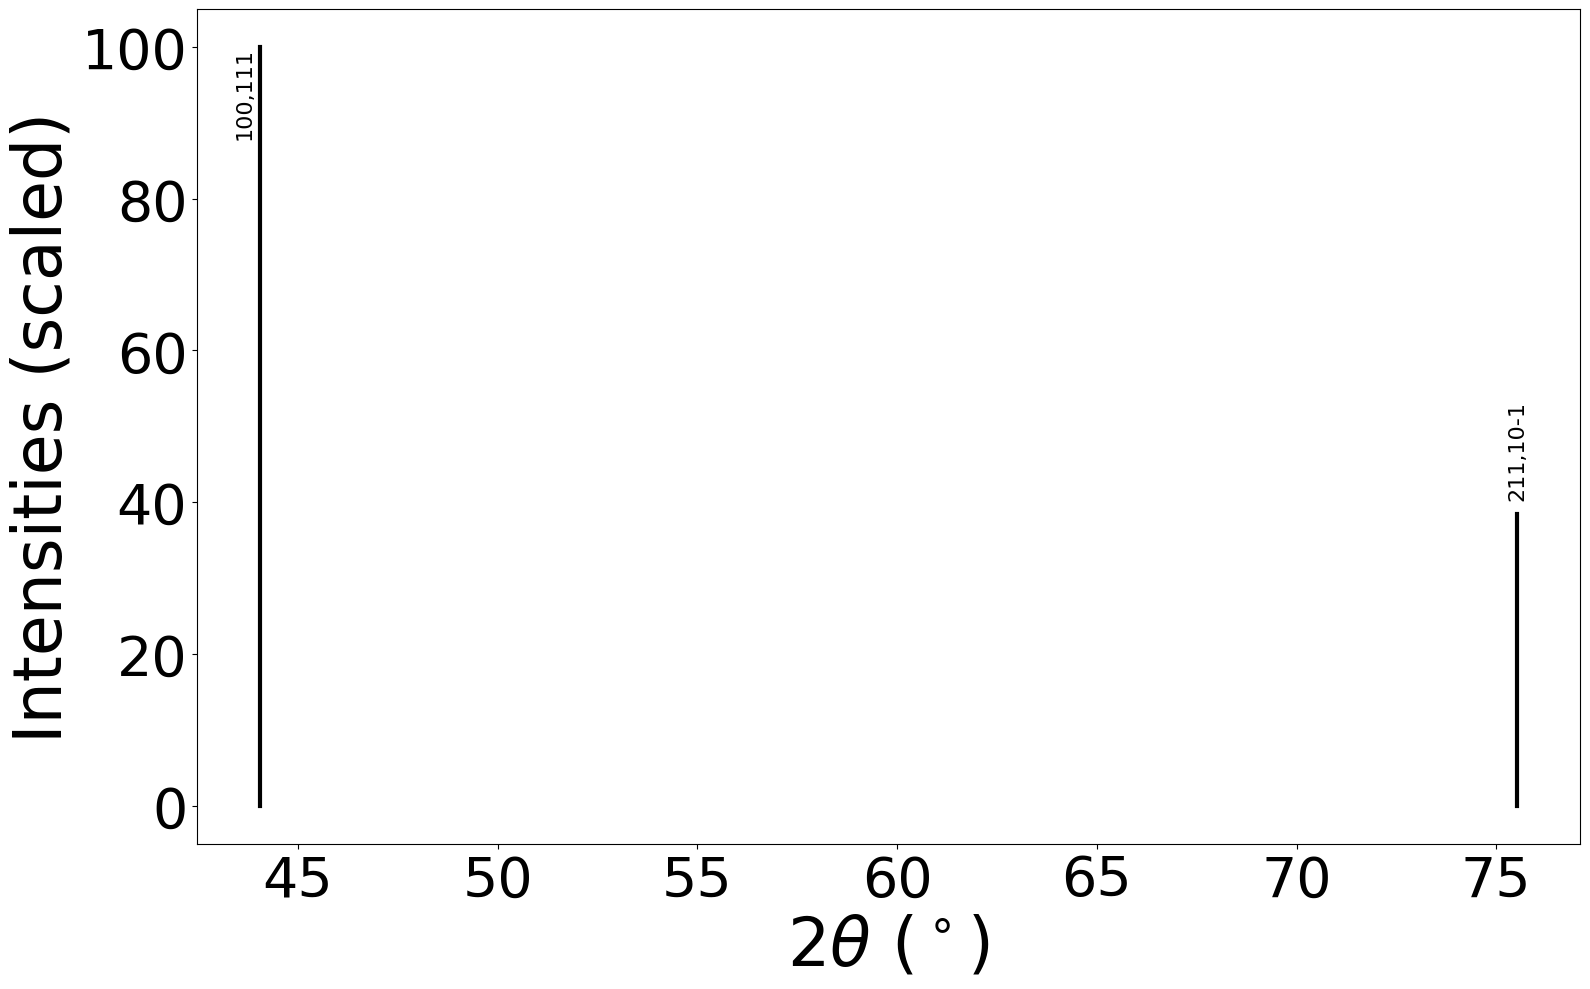

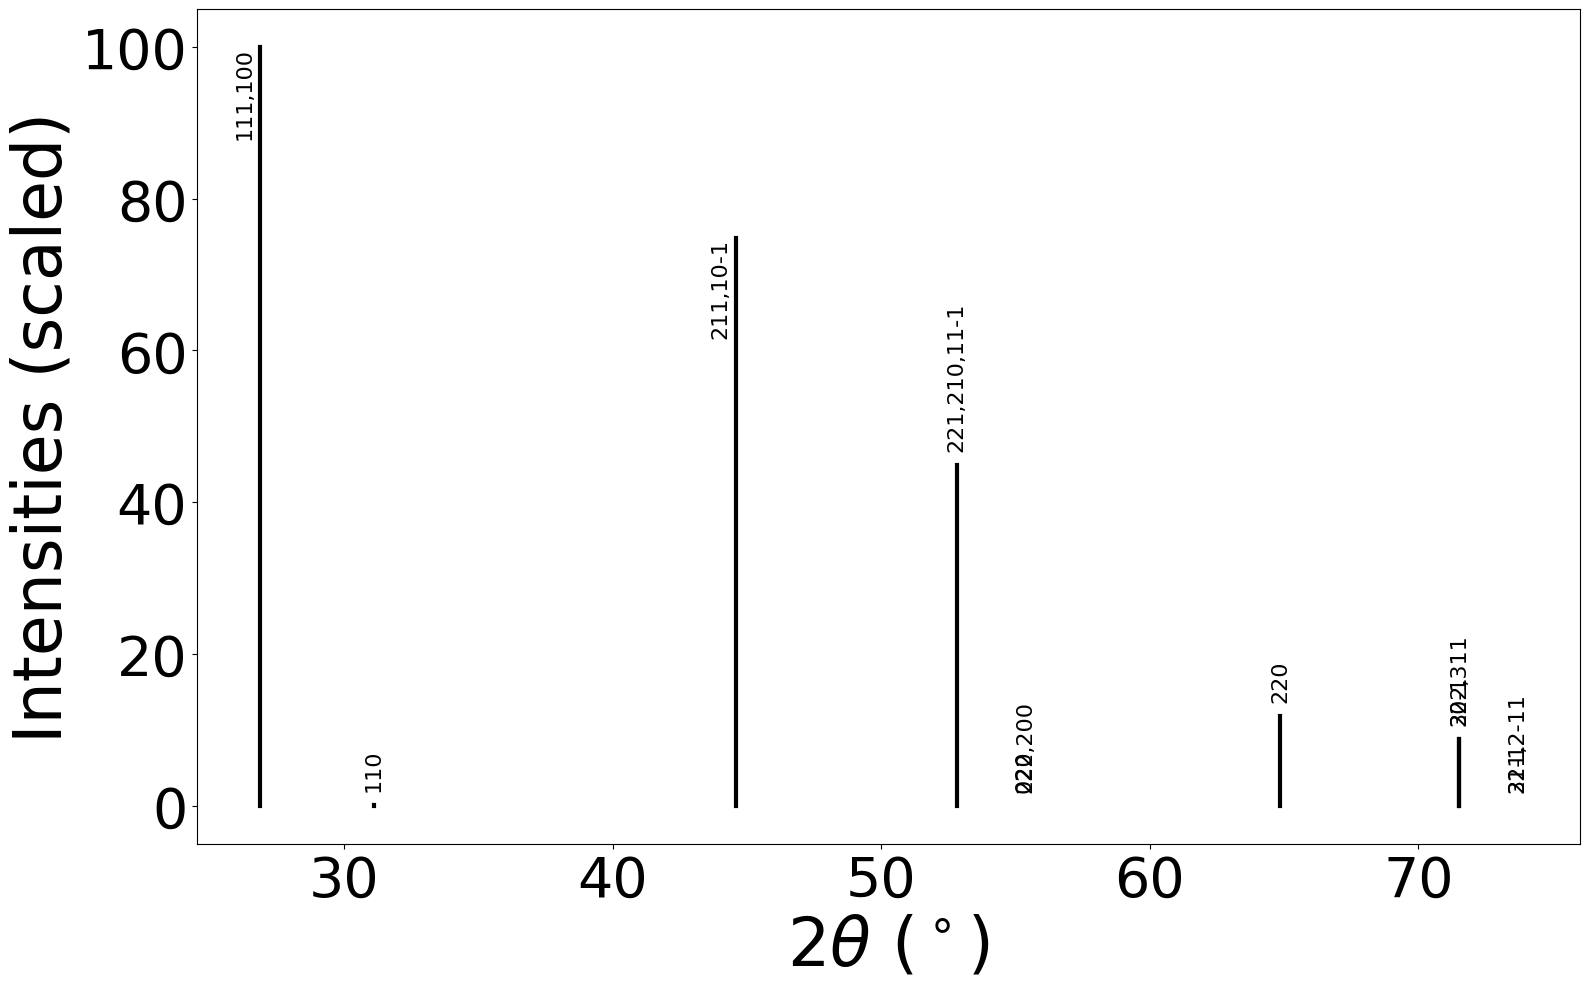

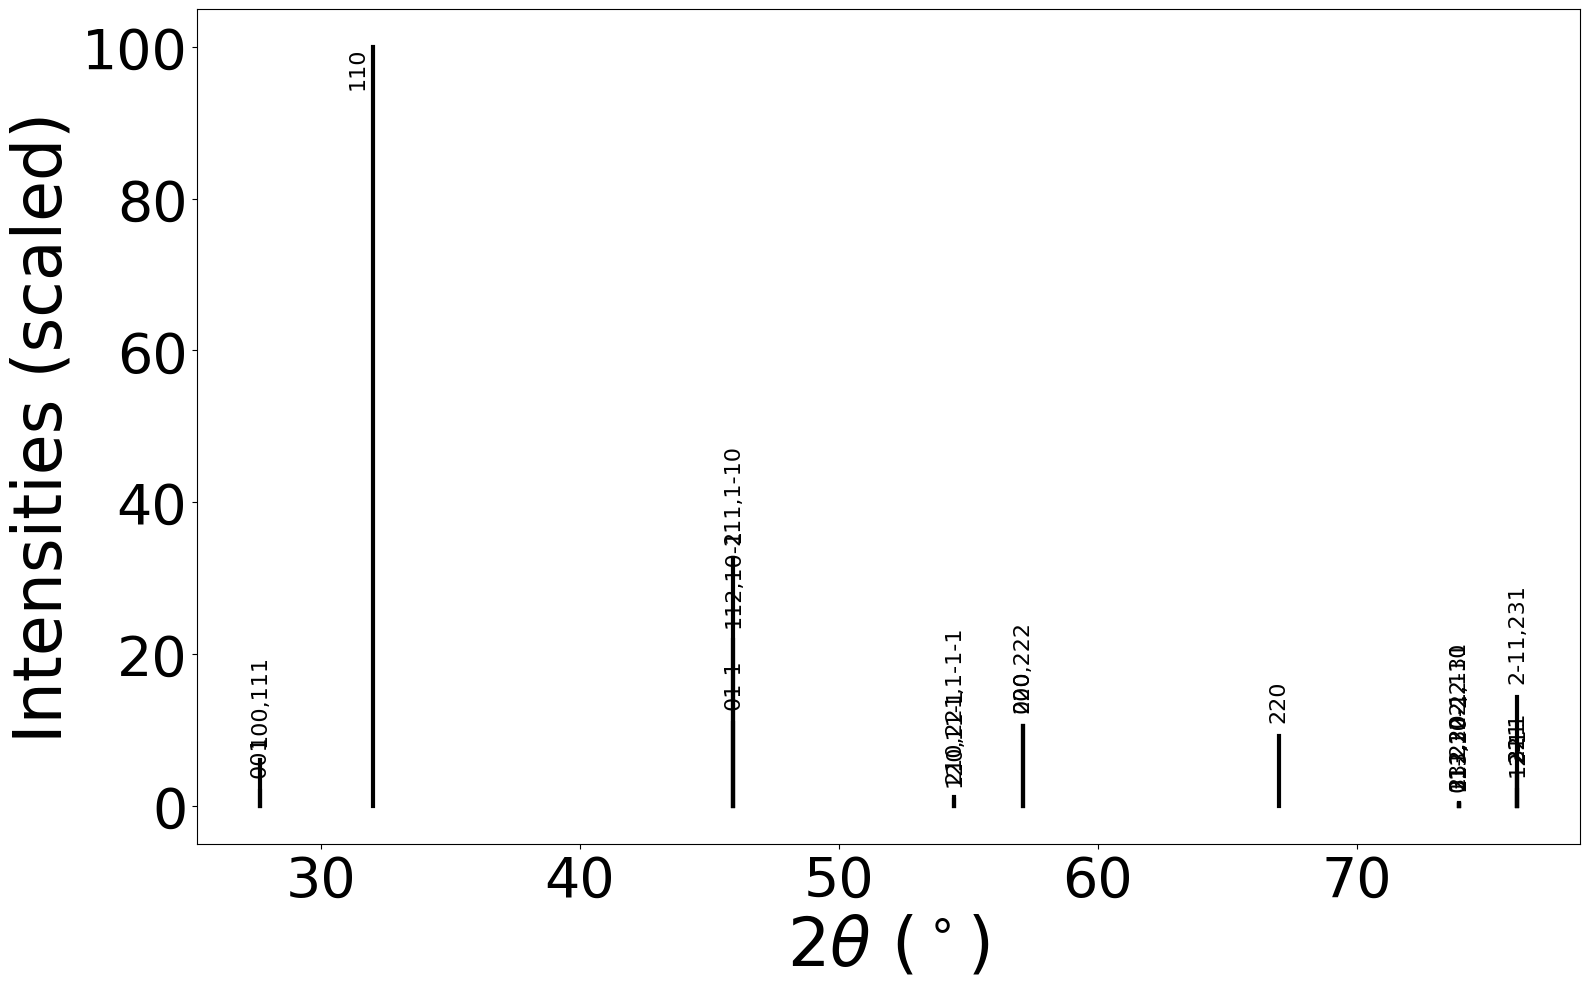

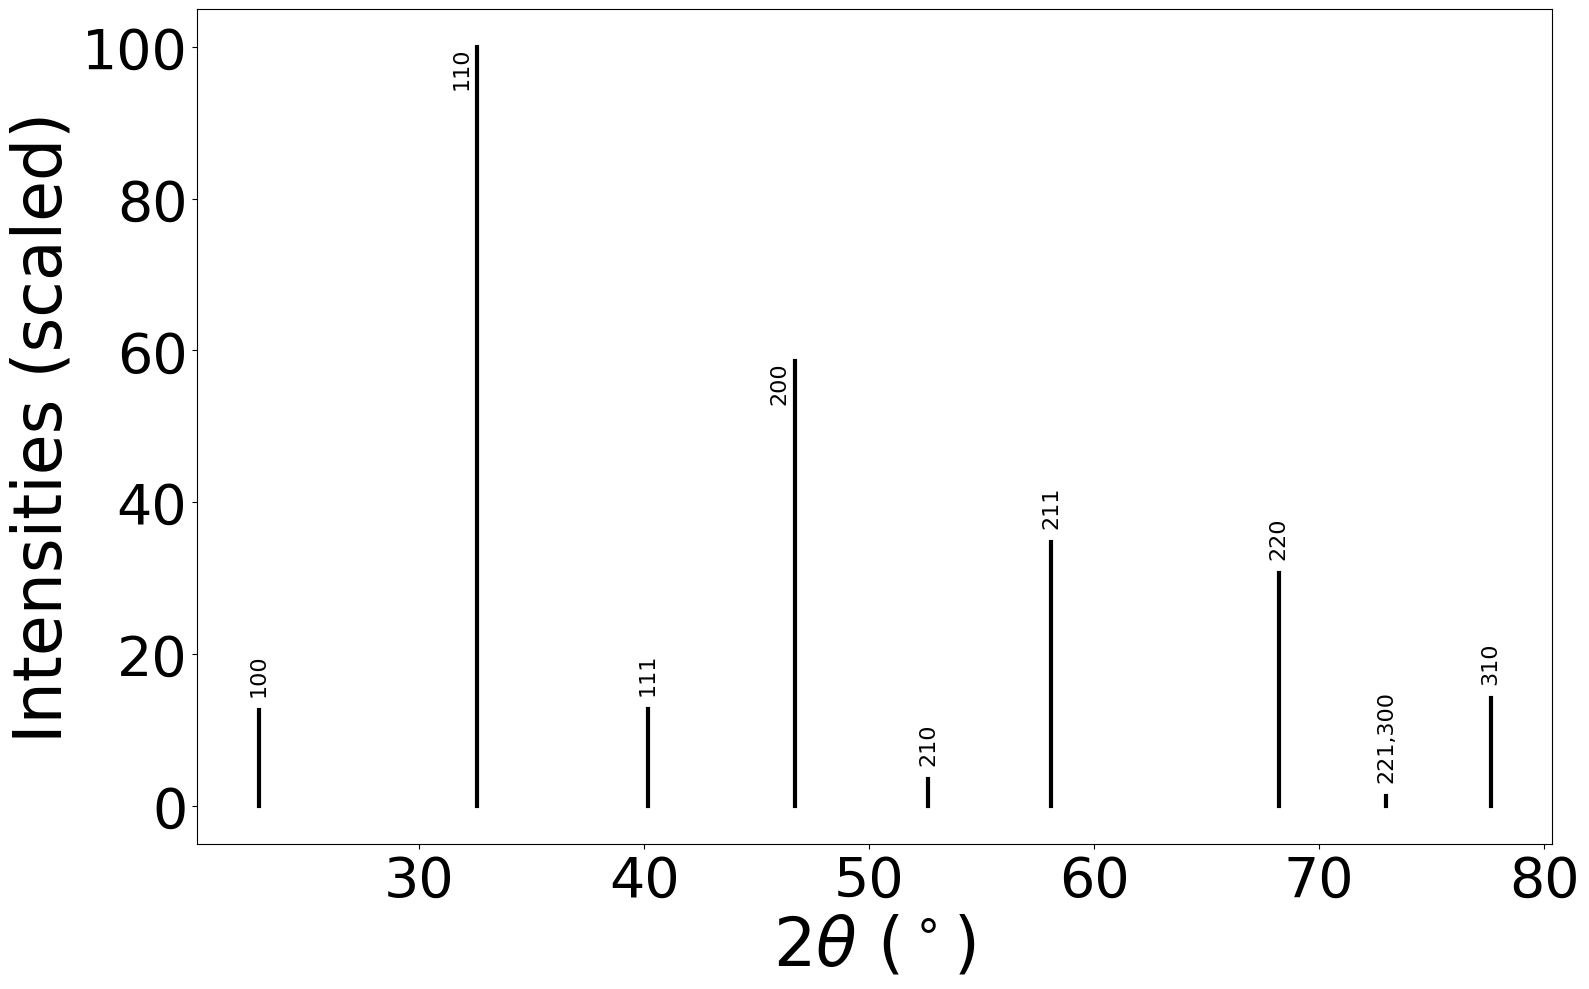

In [55]:
adpc.show_plot(diamond,two_theta_range=[20,80])
adpc.show_plot(gaas,two_theta_range=[20,80])
adpc.show_plot(rocksalt,two_theta_range=[20,80])
adpc.show_plot(perovskite,two_theta_range=[20,80])